In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('clean_comment.csv')

# Define preprocessing function
def preprocess_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(words)

# Apply preprocessing
df['Cleaned Text'] = df['Comment Text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned Text'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF scores for each word
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores_df = pd.DataFrame({'word': feature_names, 'score': tfidf_scores})
tfidf_scores_df = tfidf_scores_df.sort_values(by='score', ascending=False).head(10)

# Print top 10 TF-IDF keywords
print("Top 10 TF-IDF Keywords:")
print(tfidf_scores_df)

Top 10 TF-IDF Keywords:
              word        score
2294           hey  3102.634162
5998           use  2895.884323
5211          skin  2294.757217
646   beminimalist  2282.537791
1519            dm  2044.555603
5698         thank  1728.840545
2279          help  1690.030282
992          check  1634.314877
5029         serum  1562.564838
57            acid  1497.653435


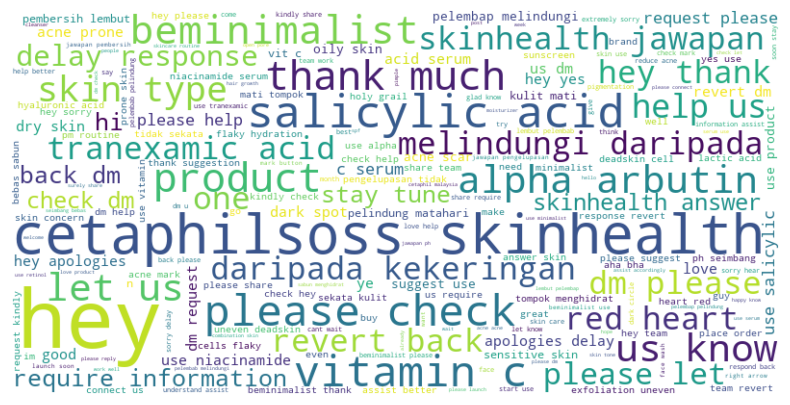

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)


Topic 1:
use acid serum niacinamide salicylic vitamin yes routine apply alpha
Topic 2:
olay saya kulit sunscreen yg burn redness sesuai sy sting
Topic 3:
thank hey launch stay soon beminimalist wait suggestion tune hair
Topic 4:
skin acne use love product hey products know help thank
Topic 5:
dm check hey revert help order kindly request beminimalist welcome


In [ ]:
import pandas as pd
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

# Apply the function to the 'Comment Text' column
df['Entities'] = df['Comment Text'].apply(extract_entities)

# Explode the entities and get the value counts
entities = df['Entities'].explode().value_counts().head(10)

# Print the top 10 entities
print("Top 10 Entities by NER:")
print(entities)
